### Wellhead protection area plot overlayed by well and cafo buffer

In [1]:
# Libraries
import numpy as np
import pandas as pd
import geopandas as gp


import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
# from mpl_toolkits.basemap import Basemap

%matplotlib inline

idir = '/Users/szalam/Main/00_Research_projects/Project_GW_SA/data/raw/shapefile/'
idir_fl = '/Users/szalam/Main/00_Research_projects/Project_GW_SA/data/raw/AEM_DWR/Survey_area4/flowlines/'

/Users/szalam/venv/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
wpa = gp.read_file(idir + "ca_statewide_gwpa/CA_Statewide_GWPAs.shp")

kw = gp.read_file(idir + "kw/Kaweah_subregion.shp")
kw.to_crs(epsg='4326', inplace=True)

#read well
well = gp.read_file(idir + 'cafo_well/well_count.shp')
well.to_crs(epsg='4326', inplace=True)
well_c = gp.clip(well, kw) #clip well using kw shape

#read CAFO
cafo = gp.read_file(idir + 'cafo_well/CAFO.shp')
cafo.to_crs(epsg='4326', inplace=True)

wpa_c = gp.clip(wpa, kw) #clip wpa using kw shape


/var/folders/24/0hnc07_91nndxxzhr7g6vpvm0000gq/T/ipykernel_56508/2135788050.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  wpa_c = gp.clip(wpa, kw) #clip wpa using kw shape


<AxesSubplot:>

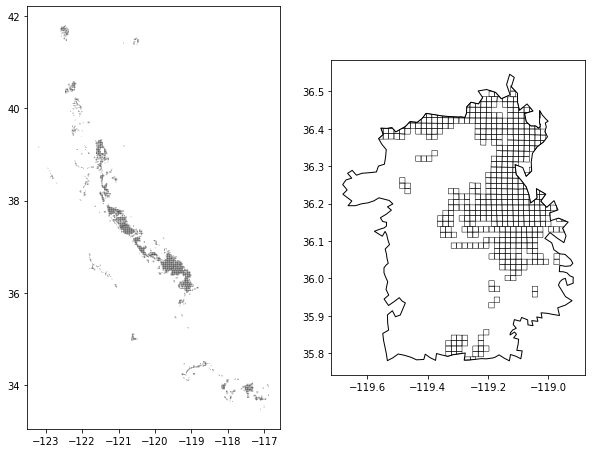

In [3]:
#Figure plot start
fig, ax = plt.subplots(1,2,figsize = (10,12))

#WPA whole CV
wpa.plot(ax = ax[0], facecolor = 'none', linewidth =.1)

#WPA plot in Kaweah
kw.plot(ax = ax[1], facecolor = 'none', linewidth =1.)
wpa_c.plot(ax = ax[1], facecolor = 'none', linewidth = .5, label = 'WPA')

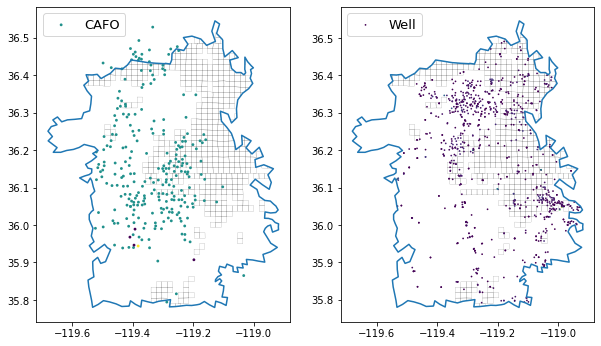

In [4]:
#Figure plot start
fig, ax = plt.subplots(1,2,figsize = (10,12))

# cafo plot
kw.boundary.plot(ax=ax[0])
wpa_c.plot(ax = ax[0], facecolor = 'none', linewidth = .1, label = 'WPA')
cafo.plot(ax = ax[0], column='anml_ty',cmap = "viridis", edgecolor = 'none', linewidth = 1,s = 8, label = 'CAFO')
ax[0].legend(loc='upper left',fontsize=13)

# well plot
kw.boundary.plot(ax=ax[1])
wpa_c.plot(ax = ax[1], facecolor = 'none', linewidth = .1, label = 'WPA')
well_c.plot(ax = ax[1], column = 'GM_RESULT_', cmap = 'viridis' , edgecolor = 'none', linewidth = 1,s = 3, label = 'Well')
ax[1].legend(loc='upper left',fontsize=13)

/var/folders/24/0hnc07_91nndxxzhr7g6vpvm0000gq/T/ipykernel_56508/968283416.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  well_b['geometry'] = well_b.buffer(0.02339412807385346) # well buffer


(36.1, 36.3)

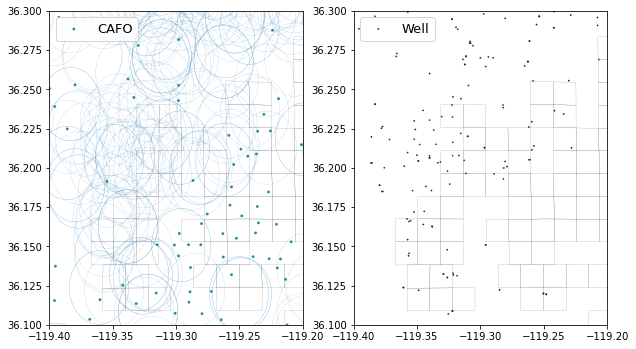

In [5]:
well_b = well_c.copy()
well_b['geometry'] = well_b.buffer(0.02339412807385346) # well buffer
# meter and degree conversion 2600/111139. 1 degree = 111139 m. Taking 2.6 km radias

# figure plot start
fig, ax = plt.subplots(1,2,figsize = (10,12))

# cafo plot
kw.boundary.plot(ax=ax[0])
wpa_c.plot(ax = ax[0], facecolor = 'none', linewidth = .1, label = 'WPA')
cafo.plot(ax = ax[0], column='anml_ty',cmap = "viridis", edgecolor = 'none', linewidth = 1,s = 8, label = 'CAFO')
well_b.boundary.plot(ax = ax[0], facecolor = 'none', linewidth = .1)

ax[0].legend(loc='upper left',fontsize=13)
ax[0].set_xlim([-119.4, -119.2])
ax[0].set_ylim([36.1, 36.3])

# well plot
kw.boundary.plot(ax=ax[1])
wpa_c.plot(ax = ax[1], facecolor = 'none', linewidth = .1, label = 'WPA')
well_c.plot(ax = ax[1], column = 'GM_RESULT_', cmap = 'viridis' , edgecolor = 'none', linewidth = 1,s = 3, label = 'Well')
ax[1].legend(loc='upper left',fontsize=13)
ax[1].set_xlim([-119.4, -119.2])
ax[1].set_ylim([36.1, 36.3])


(36.1, 36.3)

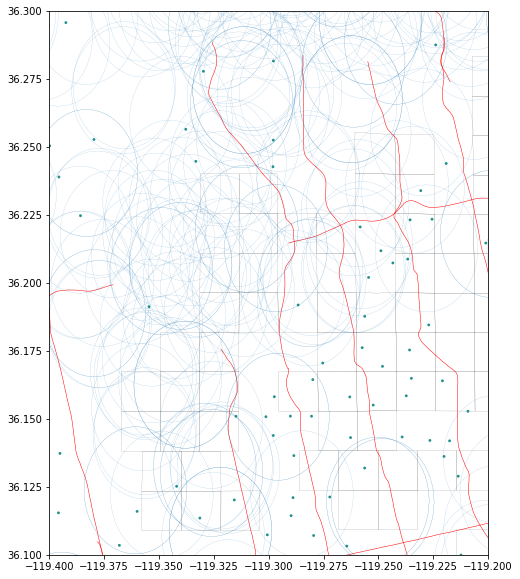

In [31]:
aem4 = gp.read_file(idir_fl + "/SA4_Flown_Flight_Lines.shp")
aem4.to_crs(epsg='4326', inplace=True)
aem4_c = gp.clip(aem4, kw) #clip well using kw shape

# figure plot start
ax = kw.boundary.plot(figsize = (14,10))
aem4_c.plot(ax = ax, linewidth = .5, edgecolor = 'red' ,label = 'AEM')
wpa_c.plot(ax = ax, facecolor = 'none', linewidth = .1, label = 'WPA')
cafo.plot(ax = ax, column='anml_ty',cmap = "viridis", edgecolor = 'none', linewidth = 1,s = 8, label = 'CAFO')
well_b.boundary.plot(ax = ax, facecolor = 'none', linewidth = .1)

ax.set_xlim([-119.4, -119.2])
ax.set_ylim([36.1, 36.3])